# COVID-19 Italy Confirmed Cases and Fatalities Forecasting

**In this notebook, the model will be predicting the cumulative number of confirmed COVID19 cases in Italy, as well as the number of resulting fatalities, for future dates. We understand this is a serious situation, and in no way want to trivialize the human impact this crisis is causing by predicting fatalities. Our goal is to provide better methods for estimates that can assist medical and governmental institutions to prepare and adjust as pandemics unfold. In this particular notebook popular facebook Prophet algorithm used.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv
/kaggle/input/covid19-global-forecasting-week-3/train.csv


**Loading Total Data**

In [3]:
train=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/train.csv')
train.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
23557,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
23558,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
23559,32710,NaN,Zimbabwe,2020-04-05,9.0,1.0
23560,32711,NaN,Zimbabwe,2020-04-06,10.0,1.0
23561,32712,NaN,Zimbabwe,2020-04-07,11.0,2.0


**Seperate Italy Data**

In [4]:
country=train[(train.Country_Region=='Italy')]
country

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
11165,15516,NaN,Italy,2020-01-22,0.0,0.0
11166,15517,NaN,Italy,2020-01-23,0.0,0.0
11167,15518,NaN,Italy,2020-01-24,0.0,0.0
11168,15519,NaN,Italy,2020-01-25,0.0,0.0
11169,15520,NaN,Italy,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
11237,15588,NaN,Italy,2020-04-03,119827.0,14681.0
11238,15589,NaN,Italy,2020-04-04,124632.0,15362.0
11239,15590,NaN,Italy,2020-04-05,128948.0,15887.0
11240,15591,NaN,Italy,2020-04-06,132547.0,16523.0


**Confirmed Cases Forecasting**

In [5]:
country_cc=country[['Date','ConfirmedCases']]
country_cc['ds']=country_cc['Date']
country_cc['y']=country_cc['ConfirmedCases']
country_cc.drop(columns=['Date','ConfirmedCases'], inplace=True)
country_cc.head()

,ds,y
11165,2020-01-22,0.0
11166,2020-01-23,0.0
11167,2020-01-24,0.0
11168,2020-01-25,0.0
11169,2020-01-26,0.0


In [6]:
from fbprophet import Prophet
model_cc=Prophet()
model_cc.fit(country_cc)

In [7]:
future = model_cc.make_future_dataframe(periods=100)
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [8]:
forecast=model_cc.predict(future)
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
172,2020-07-12,621732.285157,492357.862411,751439.598622,492023.705340,750969.385727,231.715018,231.715018,231.715018,231.715018,231.715018,231.715018,0.0,0.0,0.0,621964.000175
173,2020-07-13,626753.014291,495120.631960,756918.329346,495138.062197,757655.372847,-53.220014,-53.220014,-53.220014,-53.220014,-53.220014,-53.220014,0.0,0.0,0.0,626699.794277
174,2020-07-14,631773.743426,498729.108313,763954.339984,498008.064215,764165.698983,-382.017762,-382.017762,-382.017762,-382.017762,-382.017762,-382.017762,0.0,0.0,0.0,631391.725663
175,2020-07-15,636794.472560,501979.986419,771681.708020,501370.465255,770833.117814,-46.954451,-46.954451,-46.954451,-46.954451,-46.954451,-46.954451,0.0,0.0,0.0,636747.518109
176,2020-07-16,641815.201694,504699.336849,778627.366188,504214.664419,778588.964523,-100.486384,-100.486384,-100.486384,-100.486384,-100.486384,-100.486384,0.0,0.0,0.0,641714.715310


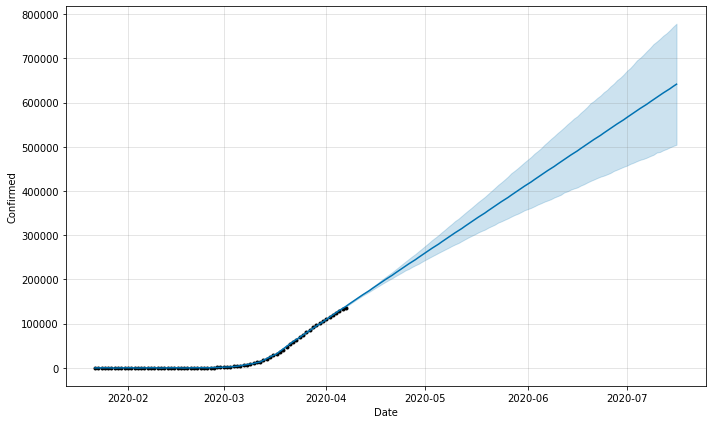

In [9]:
fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Confirmed")

**Fatalities Forecasting**

In [10]:
country_ft=country[['Date','Fatalities']]
country_ft['ds']=country_ft['Date']
country_ft['y']=country_ft['Fatalities']
country_ft.drop(columns=['Date','Fatalities'], inplace=True)
country_ft.head()

,ds,y
11165,2020-01-22,0.0
11166,2020-01-23,0.0
11167,2020-01-24,0.0
11168,2020-01-25,0.0
11169,2020-01-26,0.0


In [11]:
from fbprophet import Prophet
model_ft=Prophet()
model_ft.fit(country_ft)

In [12]:
future = model_ft.make_future_dataframe(periods=100)
forecast=model_ft.predict(future)

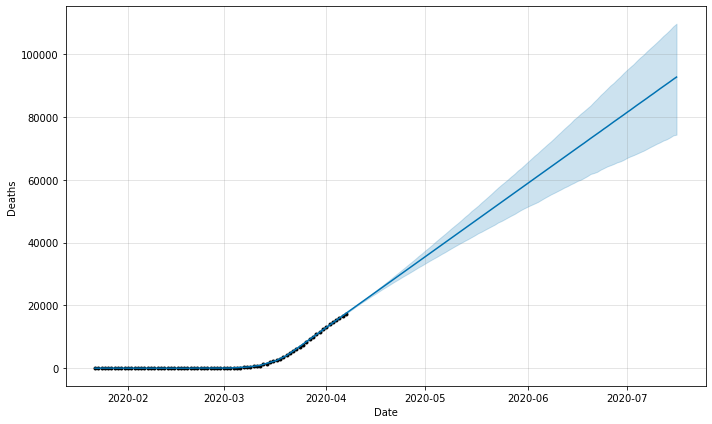

In [13]:
fig_Fatalities = model_ft.plot(forecast,xlabel = "Date",ylabel = "Deaths")

**#StayHome #StaySafe #May Almighty bless us All**

**Please upvote if you like this or find this notebook useful, thanks.**